# NVIDIA System Management Interface

Gpu hakkında bilgileri listeler

In [1]:
!nvidia-smi

Tue Jun 25 14:40:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Gerekli Kütüphanelerin Kurulumu

In [2]:
!pip install ultralytics pandas scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# Google Drive Bağlantısı

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Gerekli Kütüphaneleri Yükleme ve İçe Aktarma

In [12]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, f1_score
import matplotlib.pyplot as plt

# YOLOv8 Modeli ile Eğitimin Başlatılması

In [5]:
!yolo task=detect mode=train model=yolov8s.pt conf=0.25 data=/content/drive/MyDrive/plaka_data/data.yaml epochs=150 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 203MB/s]
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/plaka_data/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

# CSV Dosyasını Okuma ve İlk Satırları Görüntüleme

In [6]:
# CSV dosyasının yolu
file_path = '/content/runs/detect/train/results.csv'

# CSV dosyasını okur
df = pd.read_csv(file_path)

# Sütun isimlerini ve ilk birkaç satırı görüntüle
print(df.columns)
print(df.head())

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')
                     epoch           train/box_loss           train/cls_loss  \
0                        1                   2.6625                  10.7690   
1                        2                   1.7346                   5.9198   
2                        3                   1.1576                   1.5368   
3                        4                   1.0963                   1.3647   
4                        5                   1.1986                   1.4141   

            train/dfl_loss     metrics/precision(B)        metrics/re

# Gerçek ve Tahmin Edilen Etiketleri Ayıklama ve Kesikli Verilere Dönüştürme

In [7]:
# Kesikli verilere dönüştürme (0.5 eşik değeri kullanarak)
true_labels = np.where(df['      metrics/recall(B)'] > 0.5, 1, 0)  # Kesikli verilere dönüştürme
predicted_labels = np.where(df['   metrics/precision(B)'] > 0.5, 1, 0)  # Kesikli verilere dönüştürme

# Confusion Matrisi Oluşturma ve Gösterme

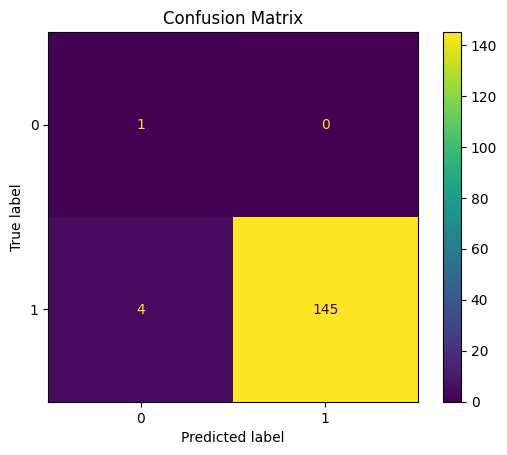

In [8]:
# Confusion matrisi oluştur
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Confusion matrisi göster
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# Precision-Recall Eğrisi Oluşturma ve Gösterme

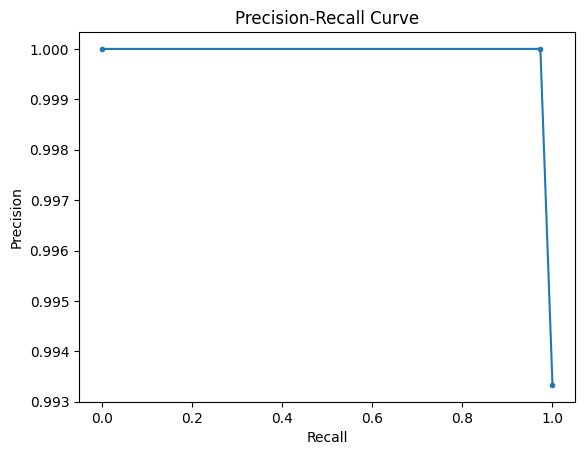

In [9]:
precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Eğrisi Oluşturma ve Gösterme

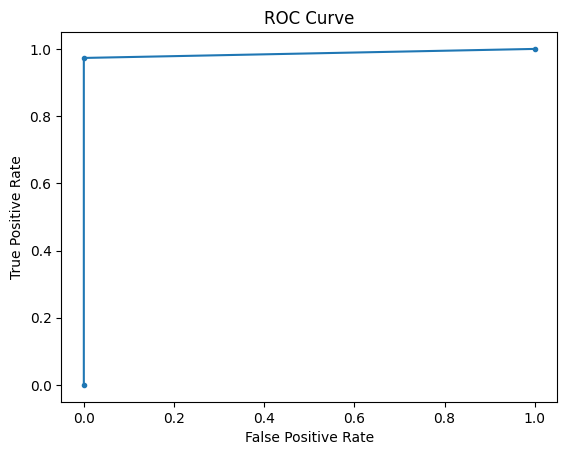

In [10]:
fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# F1 Skoru Hesaplama ve Gösterme

In [11]:
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.9820408163265307
